# Anomaly Detection & Time Series Assignment


---






## Theoretical Questions

### Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.
**Answer:** Anomaly detection is the process of identifying data points or patterns that deviate significantly from the "normal" behavior of a dataset. These outliers often indicate critical incidents like fraud, system failures, or health issues.

1. **Point Anomalies:** A single data point that is far from the rest of the data. *Example:* A $10,000 credit card transaction when the typical spend is $50.
2. **Contextual Anomalies:** A data point that is anomalous only in a specific context. *Example:* A temperature of 30°C in Antarctica during winter is an anomaly, but it's normal in the Sahara.
3. **Collective Anomalies:** A collection of data points that together indicate an anomaly, even if individual points are normal. *Example:* A sequence of rapid logins and logouts from different locations might indicate a cyber-attack.

### Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor.
**Answer:**
- **Isolation Forest:** Works by isolating observations by randomly selecting a feature and a split value. Anomalies are easier to isolate (shorter path lengths in trees). Good for high-dimensional data.
- **DBSCAN:** A density-based clustering algorithm. It labels points in low-density regions as noise. Good for spatial data but sensitive to varying densities.
- **Local Outlier Factor (LOF):** Measures the local density deviation of a point with respect to its neighbors. It identifies points that have a substantially lower density than their neighbors. Good for finding local outliers.

### Question 3: Key components of Time Series.
**Answer:**
1. **Trend:** The long-term increase or decrease in data. *Example:* Rising global temperatures over decades.
2. **Seasonality:** Periodic fluctuations that repeat over a fixed period. *Example:* Increased retail sales every December.
3. **Cyclicity:** Fluctuations that are not of a fixed period (often economic cycles). *Example:* The 5-10 year business cycle of boom and recession.
4. **Residual/Irregularity:** Random noise or unexpected events. *Example:* A sudden drop in travel due to a pandemic.

### Question 4: Define Stationary in time series.
**Answer:** A stationary time series has statistical properties (mean, variance, autocorrelation) that do not change over time. It is important because most forecasting models assume stationarity.
- **Testing:** Augmented Dickey-Fuller (ADF) test or KPSS test.
- **Transformation:** Differencing (subtracting the previous value), taking the Log, or Seasonal adjustment.

### Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX.
**Answer:**
- **AR (Autoregressive):** Predicts based on past values.
- **MA (Moving Average):** Predicts based on past forecast errors.
- **ARIMA:** Combines AR, MA, and Differencing (I) to handle non-stationary data.
- **SARIMA:** Extends ARIMA by adding seasonal components.
- **SARIMAX:** SARIMA with eXogenous variables (external factors like weather or holidays).

## Practical Questions

### Question 6: Load AirPassengers, plot, and decompose.

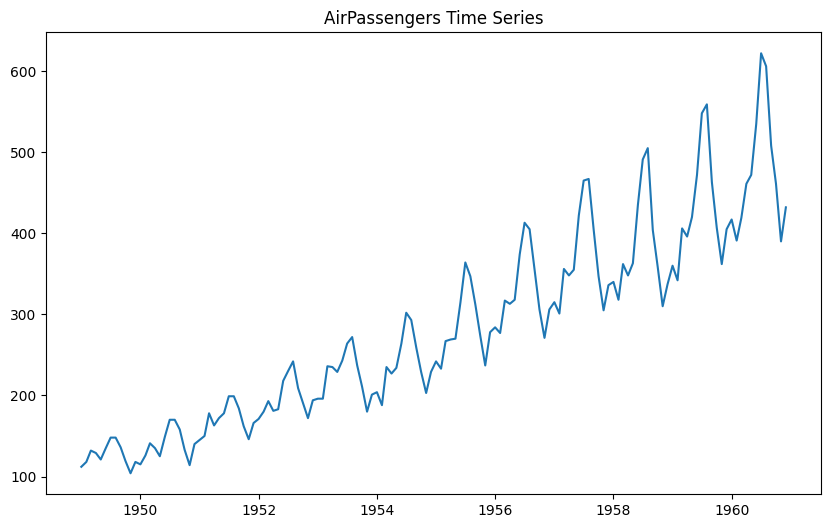

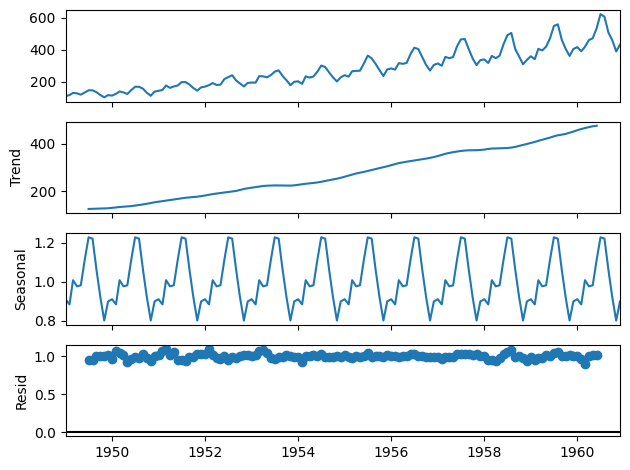

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Loading AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Plot original series
plt.figure(figsize=(10,6))
plt.plot(df, label='Original')
plt.title('AirPassengers Time Series')
plt.show()

# Decompose
decomposition = seasonal_decompose(df, model='multiplicative')
decomposition.plot()
plt.show()

### Question 7: Isolation Forest on NYC Taxi Fare.

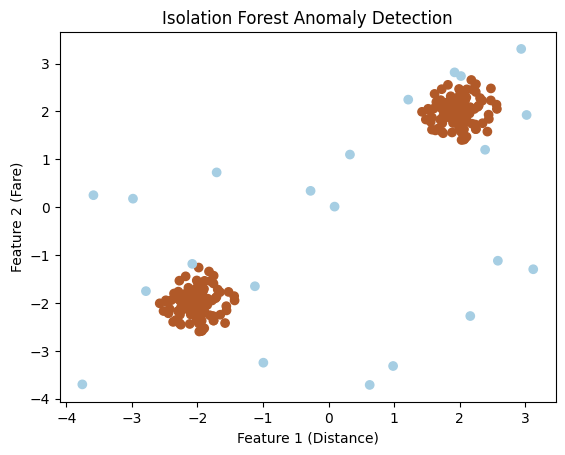

In [2]:
from sklearn.ensemble import IsolationForest
import numpy as np

# Creating synthetic data similar to NYC Taxi (amount vs distance)
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Add outliers
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
data = np.concatenate([X_train, X_outliers], axis=0)

# Isolation Forest
clf = IsolationForest(contamination=0.1, random_state=42)
y_pred = clf.fit_predict(data)

# Visualize
plt.scatter(data[:, 0], data[:, 1], c=y_pred, cmap='Paired')
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1 (Distance)')
plt.ylabel('Feature 2 (Fare)')
plt.show()

### Question 8: SARIMA Model Training and Forecast.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


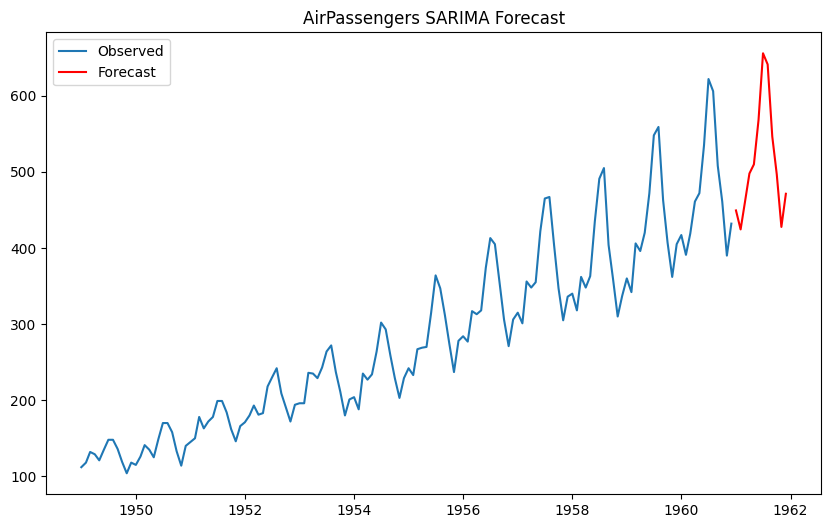

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA
model = SARIMAX(df['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast next 12 months
forecast = results.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean

# Plot
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Passengers'], label='Observed')
plt.plot(mean_forecast.index, mean_forecast, label='Forecast', color='red')
plt.title('AirPassengers SARIMA Forecast')
plt.legend()
plt.show()

### Question 9: Local Outlier Factor (LOF).

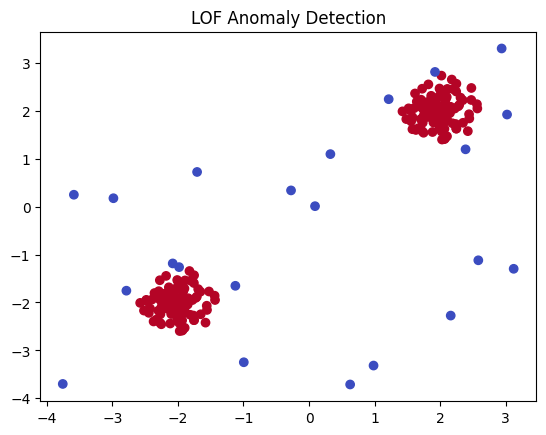

In [4]:
from sklearn.neighbors import LocalOutlierFactor

# Using the same data as Q7
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred_lof = lof.fit_predict(data)

plt.scatter(data[:, 0], data[:, 1], c=y_pred_lof, cmap='coolwarm')
plt.title('LOF Anomaly Detection')
plt.show()

### Question 10: Real-time Data Science Workflow
**Answer:**
1. **Anomalies:** For real-time streaming, **Isolation Forest** is often preferred due to its efficiency and ability to handle high dimensionality. Alternatively, a rolling-window Z-score could be used for spikes.
2. **Forecasting:** **SARIMAX** is ideal because it accounts for seasonality (time of day/week) and exogenous variables (weather impact on energy).
3. **Validation:** Use a walk-forward validation strategy and monitor metrics like MAPE (Mean Absolute Percentage Error) and RMSE.
4. **Business Value:** Prevents grid overloads, optimizes energy distribution, and allows for proactive maintenance.